In [22]:
from PIL import Image
import numpy as np
from astropy.io import fits
import glob
from PIL import Image as PILImage
import numpy as np
import pylab as pl
pl.rcParams['image.origin'] = 'lower'  # we want to show images, not matrices, so we set the origin to the lower-left
pl.matplotlib.style.use('dark_background')  # Optional configuration: if run, this will look nice on dark background notebooks

from astropy import units as u
from astropy.modeling.polynomial import Polynomial1D
from astropy.modeling.models import Gaussian1D, Linear1D
from astropy.modeling.fitting import LinearLSQFitter
from IPython.display import Image
# astroquery provides an interface to the NIST atomic line database
from astroquery.nist import Nist
import glob
import os
from astropy.io import fits

In [23]:
ov100ms_image_data =  (np.mean([fits.getdata(x) for x in glob.glob("\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\Data_dropbox_Sep14\\Overhead_100ms_clear00* AST4723C class.FIT")],
                      axis=0)
              - np.mean([fits.getdata(x)
                         for x in glob.glob("\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\Data_dropbox_Sep14\\dark_1e-1s00* AST4723C class.FIT")],
                        axis=0)
             )

Text(0.5, 1.0, 'Overhead 100ms Spectra')

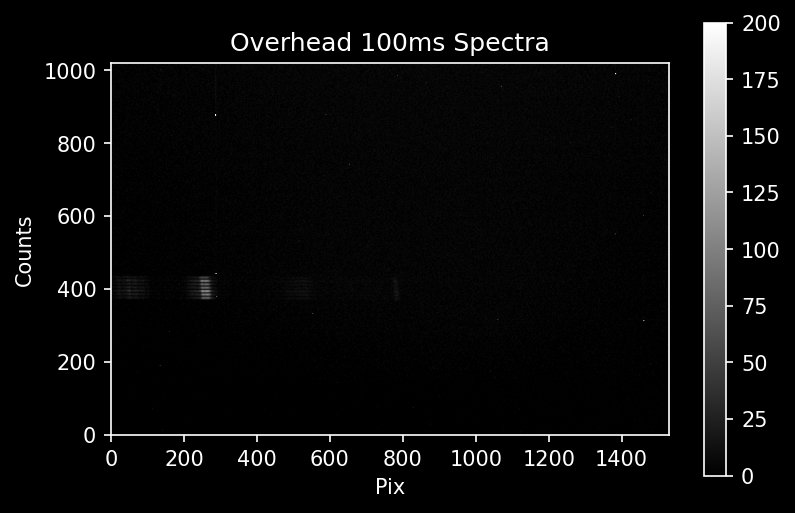

In [24]:
%matplotlib inline
import pylab as pl
pl.rcParams['image.origin'] = 'lower'
pl.rcParams['figure.dpi'] = 150
pl.matplotlib.style.use('dark_background') # Optional!
pl.imshow(ov100ms_image_data, cmap='gray', vmax=0, vmin=200)
pl.colorbar()
pl.xlabel('Pix')
pl.ylabel('Counts')
pl.title('Overhead 100ms Spectra')

Text(0.5, 1.0, 'Overhead 100ms Slope 1')

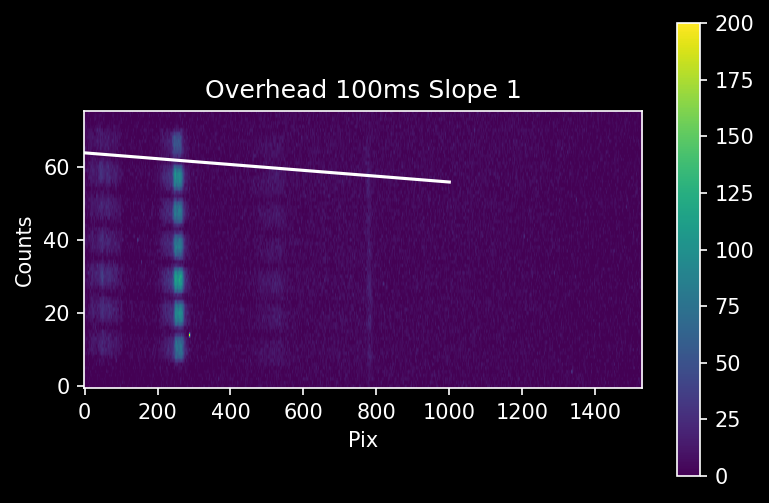

In [25]:
# I drew a line between the top two spectra
dy = -8
dx = 1000
slope = dy/dx
ystart = 365
yend = 441

image_array = np.array(ov100ms_image_data)
image_array = image_array - np.median(ov100ms_image_data)
pl.imshow(ov100ms_image_data[ystart:yend,:], vmax=0, vmin=200)
pl.colorbar()
pl.plot([0,1000], 64 + np.array([0,1000]) * slope, color='w')
pl.gca().set_aspect(10)
pl.xlabel('Pix')
pl.ylabel('Counts')
pl.title('Overhead 100ms Slope 1')

Text(0.5, 1.0, 'Overhead 100ms Slope 2')

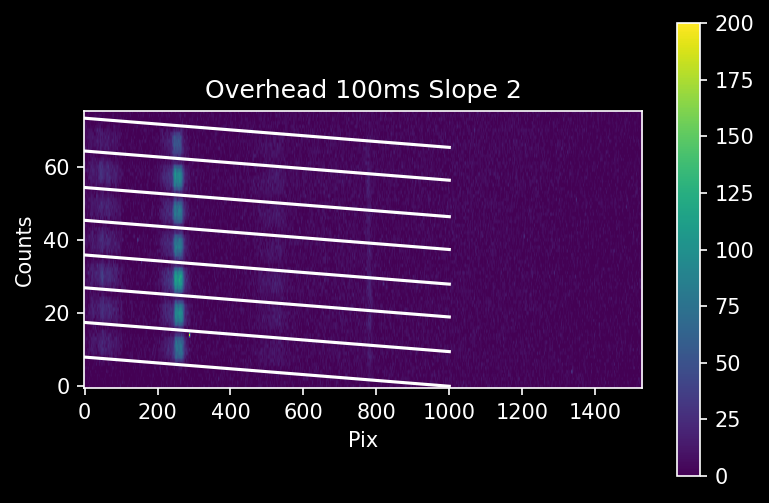

In [26]:
intertrace_cuts = np.array([ 8, 17.5, 27, 36, 45.5, 54.5, 64.5, 73.5])
image_array = np.array(ov100ms_image_data,)
image_array = image_array - np.median(ov100ms_image_data,)
pl.imshow(ov100ms_image_data[ystart:yend,:], vmax=0, vmin=200)
pl.colorbar()
pl.plot([0,1000], intertrace_cuts + np.array([0,1000])[:,None] * slope, color='w')
pl.gca().set_aspect(10)
pl.xlabel('Pix')
pl.ylabel('Counts')
pl.title('Overhead 100ms Slope 2')

Text(0.5, 1.0, 'Overhead 100ms Cutout 1')

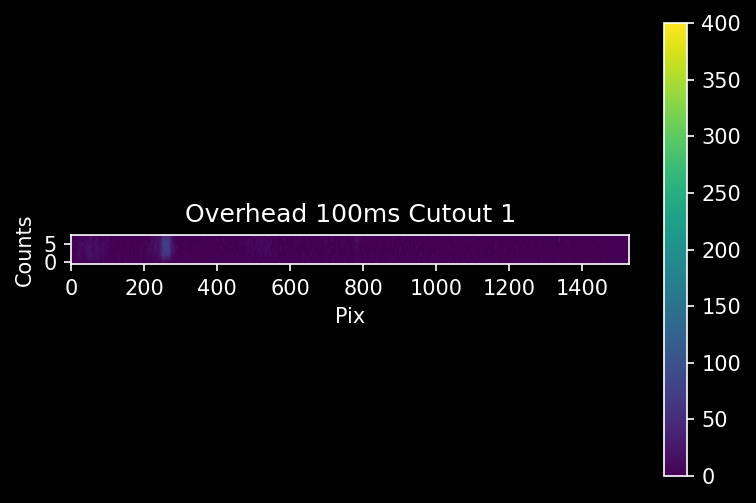

In [27]:
npixels_to_cut = 4 # very conservative - we'll see why below
xvals = np.arange(image_array.shape[1])
trace_center = ystart+(intertrace_cuts[0] + intertrace_cuts[1])/2 + xvals * slope
cutout_trace = np.array([image_array[int(yval)-npixels_to_cut:int(yval)+npixels_to_cut, ii]
                    for yval, ii in zip(trace_center, xvals)]).T
cutout_trace.shape

pl.imshow(cutout_trace, vmax=0, vmin=400)
pl.colorbar()
pl.gca().set_aspect(10);
pl.xlabel('Pix')
pl.ylabel('Counts')
pl.title('Overhead 100ms Cutout 1')

Text(113.83333333333333, 0.5, 'Counts')

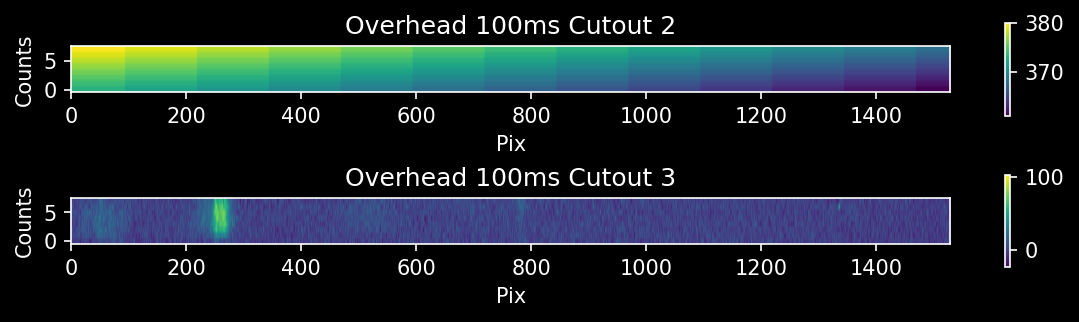

In [28]:
# to get the y-axis values corresponding to each part of our cutout trace, we do the same operation we did on the image
yaxis_full = np.arange(image_array.shape[0])
yaxis = np.array([yaxis_full[int(yval)-npixels_to_cut:int(yval)+npixels_to_cut]
                    for yval, ii in zip(trace_center, xvals)]).T

pl.figure(figsize=(8,2))
im = pl.subplot(2,1,1).imshow(yaxis)
pl.colorbar(mappable=im)
pl.gca().set_aspect(10);
pl.title('Overhead 100ms Cutout 2')
pl.xlabel('Pix')
pl.ylabel('Counts')
im = pl.subplot(2,1,2).imshow(cutout_trace)
pl.colorbar(mappable=im)
pl.gca().set_aspect(10);
pl.tight_layout()
pl.title('Overhead 100ms Cutout 3')
pl.xlabel('Pix')
pl.ylabel('Counts')

Text(0, 0.5, 'Counts')

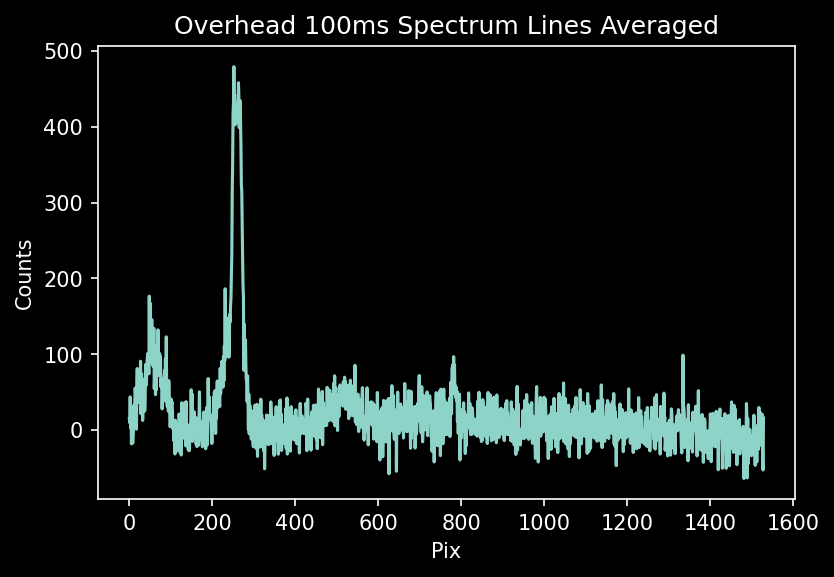

In [29]:
pl.plot(cutout_trace.sum(axis=0))
pl.title('Overhead 100ms Spectrum Lines Averaged')
pl.xlabel('Pix')
pl.ylabel('Counts')

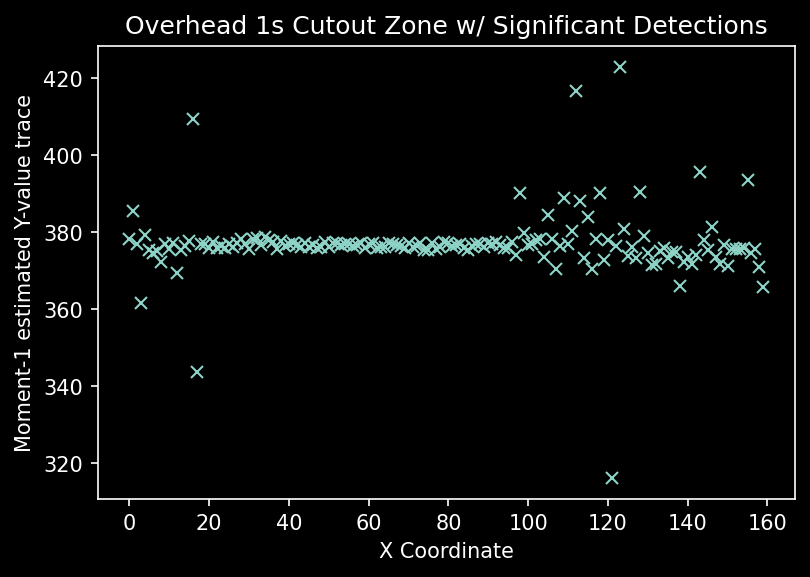

In [44]:
# moment 1 is the data-weighted average of the Y-axis coordinates
xend = 160
weighted_yaxis_values = np.average(yaxis[:,:xend], axis=0,
                                   weights=cutout_trace[:,:xend])

_=pl.plot(xvals[:xend], weighted_yaxis_values, 'x')
_=pl.xlabel("X Coordinate")
_=pl.ylabel("Moment-1 estimated Y-value trace")
_=pl.title("Overhead 1s Cutout Zone w/ Significant Detections")

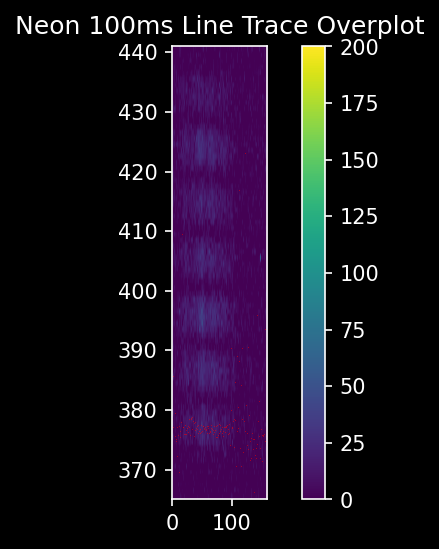

In [45]:
# we need to use the 'extent' keyword to have the axes correctly labeled
_=pl.imshow(image_array[ystart:yend, :xend],
            extent=[0,xend,ystart,yend], vmax=0, vmin=200)
_=pl.colorbar()
_=pl.gca().set_aspect(10) # we stretch the image out by 10x in the y-direction
_=pl.plot(xvals[:xend], weighted_yaxis_values[:xend], 'r,', alpha=0.5)
_=pl.axis((0,xend,ystart,yend))
_=pl.title("Neon 100ms Line Trace Overplot")